Ở những module trước, chúng ta đã khái quát những vấn đề cơ bản của Tensorflow và tự tay xây dựng mô hình để xử lý những vấn đề khác nhau. Trong module này, chúng ta sẽ đi vào những vấn đề cụ thể và xem cách thức hoạt động của một loại neural network đặc biệt trong deep learning, nó được sử dụng rất phổ biến trong thị giác máy tính (computer vision) đó là [convolutional neural networks (CNNs)](https://en.wikipedia.org/wiki/Convolutional_neural_network)

> 🔑 **Lưu ý** : Trong deep learning, có rất nhiều loại kiến trúc mô hình khác nhau được sử dụng để giải quyết cho những vấn đề cụ thể. Chẳng hạn như sử dụng Convolution neural network để dự đoán dữ liệu hình ảnh, hoặc dữ liệu dưới dạng văn bản. Tuy nhiên, trong thực tế không phải lúc nào những kiến trúc được sử dụng phổ biến là tốt nhất, mà còn có những cái khác còn có thể tốt hơn. 

Trong bài viết này, chúng ta sẽ xây dựng và sử dụng mô hình với kiến trúc CNNs để dự đoán dữ liệu hình ảnh.

## Nội dung : 

1. Chuẩn bị tập dữ liệu 
  -  Kiểm tra và đọc dữ liệu
2. Kiến trúc của Convolutional Neural Network
3. Ví dụ 
  - model_1 Sử dụng Conv2D layer
  - model_2 Sử dụng Dense layer
4. Những bước để xây dựng mô hình phân loại 2 class với CNNs
  - 4.1 Khám phá, tìm hiểu cấu trúc của tập dữ liệu
  - 4.2 Chuẩn bị dữ liệu cho mô hình
  - 4.3 Tạo mô hình CNN (bắt đầu với mô hình đơn giản làm cơ sở) 
  - 4.4 Fitting mô hình (mô hình tìm kiếm các đặc trưng trong dữ liệu `weights` , `bias` )
  - 4.5 Đánh giá mô hình
  - 4.6 Cải thiện mô hình
  - 4.7 Mô hình dự đoán




## 1. Chuẩn bị tập dữ liệu

Tập dữ gồm 2 class (`pho`, `fried_rice`) được giải nén từ từ quá trình xử lý từ [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), một tập hợp gồm 101 loại thức ăn khác nhau với 1000 hình ảnh cho mỗi loại được chụp từ thực tế, và quá trình phân tách dữ liệu này được thực hiện ở `module 4: preprocessing data`.

Do CNNs xử lý rất tốt với các dữ liệu là hình ảnh, do đó, để bắt đầu khám phá về kiến trúc này, chúng ta sẽ làm với các file hình ảnh. 




In [1]:
!wget https://www.dropbox.com/s/wlt8lwem9onvnjz/pho_fried_rice.zip

--2021-09-07 01:17:30--  https://www.dropbox.com/s/wlt8lwem9onvnjz/pho_fried_rice.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/wlt8lwem9onvnjz/pho_fried_rice.zip [following]
--2021-09-07 01:17:31--  https://www.dropbox.com/s/raw/wlt8lwem9onvnjz/pho_fried_rice.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6e04d5b6f58ee9f607b29d0a0d.dl.dropboxusercontent.com/cd/0/inline/BVqtfotafqjfD0rpsUXl-aqzEcw70Kx5jA4xEnOmJ8sB3S4pKYu80PPBjnUM1x-b7z4FwA_QLIXpIFdof9RUsBxfDoGVLtHIEDTRCCAFZTDL4-zLLuKrC2N_JyW1wH-THJHohkcrbtCmODElCNqXM5jE/file# [following]
--2021-09-07 01:17:31--  https://uc6e04d5b6f58ee9f607b29d0a0d.dl.dropboxusercontent.com/cd/0/inline/BVqtfotafqjfD0rpsUXl-aqzEcw70Kx5jA4xEnOmJ8sB3S4pKYu80PPBjnUM1x-b7z4Fw

In [2]:
# Giải nén tar.gz
import zipfile 
import os 

def unzip_file(pathname) : 
  if os.path.isdir(pathname) : 
    print("Directory has been existing")
    return 
  else : 
    zipref = zipfile.ZipFile(pathname)
    zipref.extractall()
    print("Unziped file")
    return zipref.close()

In [3]:
unzip_file("pho_fried_rice.zip")

Unziped file


### Kiểm tra và đọc dữ liệu

Một bước rất quan trọng trong bất kỳ dự án machine learning nào đó là đọc và hiểu được dữ liệu, cấu trúc và ý nghĩa của nó. Với dữ liệu hình ảnh, một loại dữ liệu không có cấu trúc, việc quan sát bằng cách hiển thị cũng là phương pháp trực quan sử dụng phổ biến. 

Cấu trúc file được tải xuống và giải nén cụ thể như sau : 

+ Một thư mục `train` chứa 2 folder `pho` và `fried_rice`, mỗi folder chứa 750  hình ảnh liên quan về nó dùng để train dữ liệu
+ Tương tự thư mục `test` cũng chứa 2 folder trên, nhưng chúng chỉ chứa 250 hình ảnh để sau khi mô hình train xong có thể tiến hành dự đoán

Ví dụ : 

```
pho_fried_rice <- top level folder
└───train <- training images
│   └───pho
│   │   │   1005681.jpg
│   │   │   10011443.jpg
│   │   │   ...      
│   └───fried_rice
│       │   1004221.jpg
│       │   1008935.jpg
│       │   ...
│   
└───test <- testing images
│   └───pho
│   │   │   1002382.jpg
│   │   │   10020153.jpg
│   │   │   ...      
│   └───fried_rice
│       │   10023430.jpg
│       │   1028159.jpg
│       │   ...    
 ```

Tạo hàm kiểm tra xem có bao nhiêu hình ảnh trong mỗi folder tính từ root folder (Folder gốc)

In [4]:
import os 
def walk_through_directory(dirname) : 
  for dirpath, dir_names, file_names in os.walk(dirname) : 
    print(f"Có {len(dir_names)} folders và {len(file_names)} files trong thư muc {dirpath}")

In [5]:
walk_through_directory("pho_fried_rice")

Có 2 folders và 0 files trong thư muc pho_fried_rice
Có 2 folders và 0 files trong thư muc pho_fried_rice/train
Có 0 folders và 750 files trong thư muc pho_fried_rice/train/pho
Có 0 folders và 750 files trong thư muc pho_fried_rice/train/fried_rice
Có 2 folders và 0 files trong thư muc pho_fried_rice/test
Có 0 folders và 250 files trong thư muc pho_fried_rice/test/pho
Có 0 folders và 250 files trong thư muc pho_fried_rice/test/fried_rice


Kiểm tra trong thư mục `pho_fried_rice/train/pho` xem có những file cụ thể nào : 

In [6]:
print(os.listdir("pho_fried_rice/train/pho"))

['1289035.jpg', '1940783.jpg', '4937.jpg', '632134.jpg', '25586.jpg', '1865868.jpg', '813319.jpg', '3125468.jpg', '1324193.jpg', '966806.jpg', '1129765.jpg', '894781.jpg', '1945425.jpg', '2128010.jpg', '3087593.jpg', '2548813.jpg', '884977.jpg', '37660.jpg', '3538985.jpg', '746268.jpg', '80649.jpg', '2796557.jpg', '2555529.jpg', '1685230.jpg', '296566.jpg', '913320.jpg', '34710.jpg', '330841.jpg', '422211.jpg', '589453.jpg', '820741.jpg', '3324207.jpg', '2942387.jpg', '2673049.jpg', '909041.jpg', '51198.jpg', '3603878.jpg', '2742214.jpg', '2040078.jpg', '3092886.jpg', '2959196.jpg', '472628.jpg', '372921.jpg', '704371.jpg', '2681196.jpg', '3199515.jpg', '872101.jpg', '1362055.jpg', '514715.jpg', '357388.jpg', '3727895.jpg', '3317161.jpg', '1258189.jpg', '1114945.jpg', '928781.jpg', '1399630.jpg', '1103597.jpg', '43012.jpg', '3595412.jpg', '3305432.jpg', '1297127.jpg', '3431440.jpg', '364807.jpg', '3230074.jpg', '1303811.jpg', '141573.jpg', '1655445.jpg', '3522344.jpg', '2437694.jpg', '

Nếu bạn không muốn sử dụng thư viện os trong python, bạn có thể sử dung lệnh `!ls` của terminal

In [7]:
!ls pho_fried_rice/train/pho

1005681.jpg  154603.jpg   2338556.jpg  2948309.jpg  3557139.jpg  543660.jpg
1011443.jpg  155287.jpg   234939.jpg   295265.jpg   3557867.jpg  549293.jpg
1012513.jpg  1563592.jpg  2351238.jpg  2952717.jpg  3559597.jpg  555835.jpg
1019401.jpg  1564774.jpg  2360117.jpg  2954509.jpg  356909.jpg	 556690.jpg
1021371.jpg  1568753.jpg  2361786.jpg  2959196.jpg  357357.jpg	 558069.jpg
1022431.jpg  157159.jpg   237386.jpg   2959909.jpg  357388.jpg	 567123.jpg
1027296.jpg  1572698.jpg  2381496.jpg  296566.jpg   3581148.jpg  567774.jpg
103323.jpg   1575794.jpg  2381828.jpg  2974607.jpg  358877.jpg	 568154.jpg
1034222.jpg  159768.jpg   238853.jpg   297655.jpg   3595412.jpg  568307.jpg
10348.jpg    160132.jpg   2395471.jpg  2977183.jpg  3597740.jpg  570845.jpg
1035074.jpg  1610475.jpg  2399877.jpg  2981476.jpg  3598546.jpg  5723.jpg
10354.jpg    1610808.jpg  2404646.jpg  2982273.jpg  3600798.jpg  576451.jpg
1037744.jpg  1612920.jpg  2409828.jpg  298816.jpg   3603878.jpg  58153.jpg
1051616.jpg  162084

Như vậy, chúng ta đã thấy được tổng quan cấu trúc của dữ liệu. Tiếp theo, như đã thấy trong mỗi folder train, test đều có folder nhỏ hơn, những folder đó gắn liền với tên của nó thì đại diện cho 1 class. Do đó, để biết được tên của các class, chúng ta sẽ lấy tên của mỗi folder nhỏ đó và sắp xếp chúng theo thứ tự

In [8]:
import pathlib
import numpy as np

data_dir = pathlib.Path("pho_fried_rice/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['fried_rice', 'pho'], dtype='<U10')

Từ những khám phá trên, có thể kết luận folder `pho_fried_rice` gồm có 2 tập dữ liệu `train` và `test` tương ứng với 750 và 250 file ảnh cho mỗi class.

Tiếp theo,ta sẽ hiển thị hình ảnh ngẫu nhiên của một class trong tập `train` hoặc `test`. Để làm được điều này, ta sẽ tạo một hàm có tên `plot_random_image` nhận 3 tham số : 
+ target_dir : đường dẫn liên kết đến tập `train` hoặc `test` 
+ target_class : tên class để hiển thị ảnh ngẫu nhiên
+ n_samples : Số lượng hình ảnh muốn hiển thị

In [9]:
import random
import math
import matplotlib.pyplot as plt

In [10]:
def plot_random_images(target_dir, target_class, n_samples=1) : 
  path_dir = os.path.join(target_dir,target_class) 
  list_random_image_names = random.sample(os.listdir(path_dir), k=n_samples)
  n_cols = 3 
  n_rows = math.ceil(n_samples / n_cols)
  plt.figure(figsize=(n_cols*4, n_rows*4 ))
  images = []
  for i, image_name in enumerate(list_random_image_names) :     
    image_path = os.path.join(path_dir, image_name)
    image = plt.imread(image_path)
    images.append(image)
    plt.subplot(n_rows,n_cols,i+1)
    plt.imshow(image)    
    plt.axis(False)
  plt.suptitle(f"Images for : {target_class}",horizontalalignment="center")    
  return images

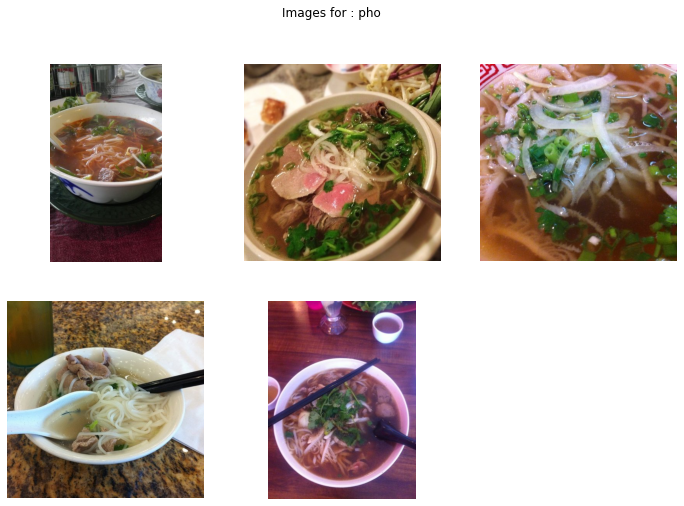

In [11]:
pho_images = plot_random_images("pho_fried_rice/train", "pho", 5)

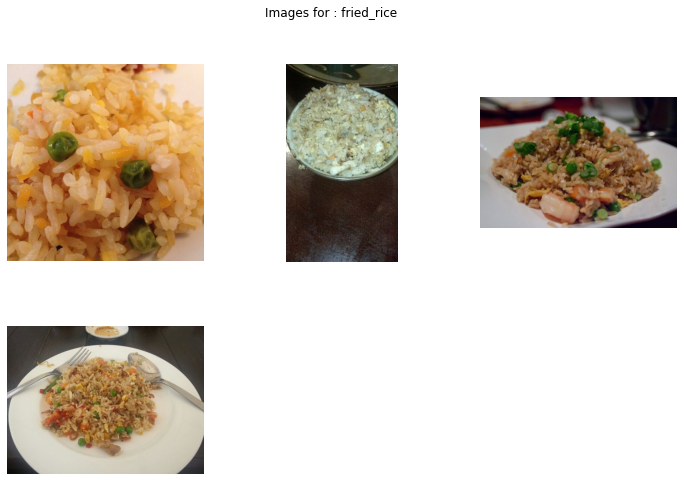

In [12]:
fried_rice_images = plot_random_images("pho_fried_rice/train", "fried_rice", 4)

Trên đây là những hình ảnh được vẽ từ ma trận của chúng, vậy phía sau những hình ảnh này thì hình thù của chúng như thế nào ? 

VD: ta lấy hình đầu tiên của danh sách các hình ảnh từ list `pho_images`, khi in ra nó sẽ là một ma trận 

In [13]:
pho_image_item = pho_images[0]
pho_image_item

array([[[ 61,  31,  33],
        [ 51,  25,  26],
        [ 46,  26,  27],
        ...,
        [ 99,  94,  88],
        [ 99,  94,  88],
        [100,  95,  89]],

       [[ 57,  25,  26],
        [ 50,  21,  23],
        [ 48,  28,  29],
        ...,
        [144, 139, 133],
        [144, 139, 133],
        [145, 140, 134]],

       [[ 65,  31,  32],
        [ 59,  29,  29],
        [ 58,  34,  34],
        ...,
        [144, 141, 136],
        [145, 142, 137],
        [146, 143, 138]],

       ...,

       [[ 97,  49,  61],
        [100,  50,  62],
        [ 92,  40,  53],
        ...,
        [ 45,  10,  17],
        [ 49,  14,  21],
        [ 51,  16,  23]],

       [[ 97,  49,  61],
        [103,  53,  65],
        [103,  51,  64],
        ...,
        [ 46,  13,  20],
        [ 52,  17,  24],
        [ 45,  10,  17]],

       [[ 85,  37,  49],
        [ 86,  36,  48],
        [ 86,  34,  47],
        ...,
        [ 43,  10,  17],
        [ 47,  14,  21],
        [ 51,  18,  25]]

Hình thù cụ thể của hình :

In [14]:
pho_image_item.shape

(512, 288, 3)

hình thái của hình ảnh trên `(384,512,3)` đại diện trưng cho (`Chiều rộng (Width)`, `Chiều cao(Height)`, `Kênh màu(Color channels)`). Như vậy, hình ảnh trên có chiều rộng là **384**, chiều cao là **512**, và sô kênh màu là **3** RGB(red,green blue)

Trong trường hợp của tập dữ liệu này, chiều rộng và chiều cao có thể thay đổi kích thước, nhưng kênh màu luôn luôn là 3. 

Một điều lưu ý, tất cả các phần tử trong ma trận đều nằm trong khoảng từ 0-255. Điều này là vì phạm vi màu RGB đều chỉ nằm trong khoảng này. Ví dụ `red=255,green=0,blue=0` thì sẽ là màu đỏ...

Chính vì có sự khác thay đổi trong phạm vi màu đó nên khi xây dựng mô hình, nó sẽ tìm kiếm những điểm khác biệt giữa `pho` và `fried_rice`. Từ đó, nó sẽ tìm kiếm các điểm đặc trưng (`weights` và `bias`) trong mỗi giá trị pixel khác nhau để xác định hình ảnh đó thuộc class nào

> **🔑 Lưu ý** : Như đã đề cập ở những module trước, có rất nhiều mô hình machine learning (bao gồm cả neural network) chúng hoạt động tốt trên những giá trị được chuẩn hóa từ 0-1. Do đó, một trong những bước quan trọng nhất trước khi tiến hành xây dựng mô hình là phải **scale** (chuẩn hóa) dữ liệu. Ví giá trị lớn nhất của hình ảnh luôn cố định là 255, nên muốn scale dữ liệu này, chỉ cần lấy tất cả phần từ chia cho 255.



In [15]:
pho_image_item / 255.

array([[[0.23921569, 0.12156863, 0.12941176],
        [0.2       , 0.09803922, 0.10196078],
        [0.18039216, 0.10196078, 0.10588235],
        ...,
        [0.38823529, 0.36862745, 0.34509804],
        [0.38823529, 0.36862745, 0.34509804],
        [0.39215686, 0.37254902, 0.34901961]],

       [[0.22352941, 0.09803922, 0.10196078],
        [0.19607843, 0.08235294, 0.09019608],
        [0.18823529, 0.10980392, 0.11372549],
        ...,
        [0.56470588, 0.54509804, 0.52156863],
        [0.56470588, 0.54509804, 0.52156863],
        [0.56862745, 0.54901961, 0.5254902 ]],

       [[0.25490196, 0.12156863, 0.1254902 ],
        [0.23137255, 0.11372549, 0.11372549],
        [0.22745098, 0.13333333, 0.13333333],
        ...,
        [0.56470588, 0.55294118, 0.53333333],
        [0.56862745, 0.55686275, 0.5372549 ],
        [0.57254902, 0.56078431, 0.54117647]],

       ...,

       [[0.38039216, 0.19215686, 0.23921569],
        [0.39215686, 0.19607843, 0.24313725],
        [0.36078431, 0

## 2. Kiến trúc của Convolutional Neural Network

Convolutional neural networks không có sự khác biệt giữa các loại khác nhau của nó trong deep learning neural network. Thực ra, chúng được tạo bằng nhiều cách khác nhau. Dưới đây là các thành phần xây dựng nên Convolutional neurals network : 


| **Hyperparameter - Layer type** | **Chức năng** | **Các tham số cụ thể** | 
| ----- | ----- | ----- |
| Input images (Dữ liệu hình ảnh được đưa vào mô hình) | Hình ảnh được đưa vào để tìm các đặc trưng trong nó  | Bất kỳ hình ảnh nào được chụp hoặc lấy từ video | 
| Input layer |Tiếp nhận các hình ảnh và xử lý chúng trước khi chuyển tiếp đến các layer khác | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer (layer tích chập) | Layer này có nhiệm vụ phân tách, tìm kiếm và học và tổng hợp các đặc tính quan trọng nhất của một hình ảnh truyền vào | [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) | 
| Hidden activation | Hàm để giúp các đặc tính được học trở nên phi tuyến (không tuyến tính hay theo quán tính của một đường thằng) | Thường sử dụng ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) | 
| Pooling layer | Giảm kích thước của các đặc tính hình ảnh được học |  Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) hoặc Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) | 
| Full connected layer | Tinh chỉnh thêm các đặc tính đã được học từ các layer tích chập (convolution layer) |  [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Từ các đặc tính đã được học để  tạo ra kết quả là xác xuất cho mỗi class trong tổng số các class đó | `output_shape = [number_of_classes]` (e.g. 4 for pho, fried_rice, pizza, hoặc steak) |
| Output activation | Thêm hàm phi tuyến cho layer output | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) cho mô hình 2 class (binary classification) hoặc [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) cho mô hình nhiều hơn 2 class |


![image](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)


## Ví dụ

Ở phần trên, chúng ta đã kiểm tra mỗi class trong 2 tập dữ liệu `train` và `test`. Với tập dữ liệu `train`, mỗi class đều có 750 file hình, còn với tập dữ liệu `test`, mỗi clas đều có 250 file hình, và tất cả những hình này không phải lúc nào chúng cũng có cùng kích thước với nhau. 

Nếu sử dụng machine learning để đánh giá mô hình theo như [original dataset authors paper](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf), we see they used a [Random Forest machine learning model](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d), có thể thấy rằng độ chính xác trung bình của mô hình dự đoán chỉ khoảng ~50%. Vậy chúng ta sẽ xem 50% độ chính xác là cơ sở để xây dựng cho những mô hình dự đoán tiếp theo phải tốt hơn mô hình này. 

Đoạn code dưới đây sẽ liên kết từ đầu đến cuối cho quá trình xây dựng mô hình cho đến đánh giá và dự đoán mô hình bằng Convolutional Neural network (CNN). Do đó, sẽ có nhiều đoạn code mà bạn chưa từng gặp trước đó, nhưng đừng lo lắng, ở những phần sau sẽ làm rõ từng khái niệm và ý nghĩa của chúng. 

Tuy nhiên, trước khi đọc những đoạn code dưới đây, bạn nên giành một giờ để đọc phần giải thích về cách thức hoạt động của CNN tại [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/).

> 🔑 **Lưu ý**: Quá trình xử lý dữ liệu bằng hình ảnh hoặc những dữ liệu ma trận phức tạp nếu bạn xử lý bằng CPU sẽ diễn ra rất chậm. Do đó, trong Tensorflow có hỗ trợ xử lý những kiểu dữ liệu phức tạp này bằng GPU với tốc độ nhanh hơn CPU >30 lần. Tuy nhiên, để có thể mua một GPU phục vụ cho quá trình học tập sẽ rất tốn kém, nhưng may mắn thay https://colab.research.google.com/ có hỗ trợ miễn phí chạy mô hình với GPU. Trước khi tiến hành chạy tất cả, trên thanh công cụ bạn chọn `Thời gian chạy (Runtime) -> Thay đổi thời gian chạy(Change Runtime Type) -> Chọn GPU thay vì None`. Sau đó tiến hành `Chạy tất cả (Run all)`. 

Để kiểm tra xem notebook hiện tại đã chạy bằng GPU chưa bạn có thể gõ lệnh sau :


In [16]:
!nvidia-smi 

Tue Sep  7 01:17:44 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### model_1 Sử dụng Conv2D layer

In [17]:
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, layers

In [18]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_dir = "pho_fried_rice/train"
test_dir = "pho_fried_rice/test"

train_dataset = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(224,224), # đồng bộ kích thước hình ảnh (228,288)
                                                  class_mode="binary",# 2 class nên là binary, nếu nhiều class là categorical,
                                                  batch_size=32, #batch size có chức năng chia tập dữ liệu khổng lồ thành các cụm nhỏ hơn để xử lý,
                                                  seed=42) 

test_dataset = test_datagen.flow_from_directory(test_dir, 
                                                target_size=(224,224), 
                                                class_mode="binary", 
                                                batch_size=32,
                                                seed=42)

model_1 = Sequential([
  layers.Conv2D(filters=10,kernel_size=3, strides=1, padding="valid",activation="relu", input_shape=(224,224,3)),
  layers.Conv2D(10,3, activation="relu"),
  layers.MaxPool2D(), 
  layers.Conv2D(10,3,activation="relu"),
  layers.Conv2D(10,3,activation="relu"),
  layers.MaxPool2D(), 
  layers.Flatten(),
  layers.Dense(1, activation="sigmoid")
])

model_1.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_1_history = model_1.fit(
    train_dataset, 
    steps_per_epoch=len(train_dataset),
    epochs=5,
    validation_data=test_dataset,
    validation_steps=len(test_dataset)
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 246ms/step - loss: 0.6638 - accuracy: 0.6060 - val_loss: 0.5676 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.5413 - accuracy: 0.7307 - val_loss: 0.4964 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4942 - accuracy: 0.7587 - val_loss: 0.4280 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4184 - accuracy: 0.8013 - val_loss: 0.4213 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3386 - accuracy: 0.8580 - val_loss: 0.3931 - val_accuracy: 0.8140


Sau 5 epochs, `model_1` đã đạt `val_accuracy` ~ 83%, độ chính xác vượt trội so với mô hình cơ sở ~50%. Tuy nhiên, mô hình mà chúng ta đang thực hiện mới chỉ dự đoán 2 class so với tổng số 101 class trong tập dữ liệu. Vì vậy không thể so sánh trực tiếp với mô hình cơ sở lúc này.

Sau khi fit mô hình, kiểm tra xem kiến trúc mô hình : 

In [19]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

Tên các layers của `model_1` đã được giải thích trong [CNN explainer website](https://poloclub.github.io/cnn-explainer/), bạn có thể tham khảo từ đó.

Có một số thứ ở mô hình trên bạn chưa từng thấy, bây giờ sẽ cắt nghĩa một chút : 

- Đầu tiên là class `ImageDataGenerator` với tham số `rescale` : 



### model_2 sử dụng Dense layer

Để dẫn chứng cho cách Neural network điều chỉnh phù hợp với nhiều vấn đề khác nhau, chúng ta sẽ quay lại mô hình đã được build của `model_3` sử dụng với Dense layer. 

Nếu chúng ta sử dụng các layer, unit như trước ngoài trừ : 
  - **data** : Hiện tại dữ liệu là những hình ảnh thay vì các điểm. 
  - **Hình dạng của dữ liệu nhập vào** : Chúng ta phải cho neural network biết hình dạng của hình ảnh mà chúng ta đang làm việc. Với Dense layer, một thực tế phổ biến là phải reshape tất cả hình ảnh cùng một kích thước. Chúng ta có hình ảnh kích thước `(224,224,3)` , nghĩa là chiều rộng là 224, chiều cao là 224, và độ sâu là 3 cho các kênh màu red, green, blue.
  

In [20]:
tf.random.set_seed(42)

model_2 = Sequential([
  layers.Flatten(input_shape=(224,224,3)),                     
  layers.Dense(10, activation="relu"),
  layers.Dense(10, activation="relu"),
  layers.Dense(1, activation="sigmoid"),
])

model_2.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_2_history = model_2.fit(
    train_dataset,     
    steps_per_epoch=len(train_dataset),
    epochs=5 ,
    validation_data=test_dataset, 
    validation_steps=len(test_dataset)
)

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 0.9584 - accuracy: 0.4933 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


Mô hình không thay đổi `val_accuracy` sau 5 epochs với độ chính xác 50%, có thể thấy một điều rằng nó không học được bất kỳ điều gì.

Kiến trúc của mô hình `model_2`: 

In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1505290   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 1,505,411
Trainable params: 1,505,411
Non-trainable params: 0
_________________________________________________________________


`model_1` có `total_params` chỉ với 31,101 những học được rất nhiều (`val_accuracy` ~83%) trong khi `model_2` có `total_params` lên đến 1,505,411 những không học được bất cứ thứ gì (`val_accuracy` ~50%). 

> 🔑 **Lưu ý** : Có thể bạn nghĩ rằng `Trainable params` là những đặc trưng mà mô hình học được từ dữ liệu. Về logic, con số này càng lớn thì mô hình càng tốt. Trong nhiều trường hợp, điều đó là đúng. Nhưng với trường hợp của `model_1` và `model_2`, điểm khác biệt ở đây là 2 kiểu mô hình khác nhau. Với loạt chuỗi dense layer của `model_2` do có nhiều learnable parameters khác nhau được kết nối chéo với nhau nên dẫn đến số lượng learnable parameters rất cao. Trong khi với **convolutional neural network** chỉ tìm cách sắp xếp và học những đặc tính nào của hình ảnh là quan trọng. Chính vì vậy, mặc dù **convolutional neural network** có ít learnable parameter hơn nhưng chúng thường phân tách tốt hơn các đặc tính khác nhau trong một hình ảnh.

Vì `model_2` không học được gì, liệu tăng số lượng Dense layer cùng với neuron trong mỗi layer và train lâu hơn thì `model_2` có cải thiện được không nhỉ ? 🤔

In [22]:
tf.random.set_seed(42)

model_3 = Sequential([
  layers.Flatten(input_shape=(224,224,3)),
  layers.Dense(128,activation="relu") ,
  layers.Dense(128,activation="relu") ,
  layers.Dense(128,activation="relu") ,
  layers.Dense(1,activation="sigmoid") ,
])

model_3.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_3.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=10, 
    validation_data=test_dataset, 
    validation_steps=len(test_dataset)
)

Epoch 1/10
47/47 [==============================] - 10s 204ms/step - loss: 6.2395 - accuracy: 0.5053 - val_loss: 5.2971 - val_accuracy: 0.5020
Epoch 2/10
47/47 [==============================] - 9s 199ms/step - loss: 1.7320 - accuracy: 0.5500 - val_loss: 0.6429 - val_accuracy: 0.6580
Epoch 3/10
47/47 [==============================] - 9s 198ms/step - loss: 0.8029 - accuracy: 0.6287 - val_loss: 0.5636 - val_accuracy: 0.7180
Epoch 4/10
47/47 [==============================] - 9s 199ms/step - loss: 0.6446 - accuracy: 0.6793 - val_loss: 0.5471 - val_accuracy: 0.7140
Epoch 5/10
47/47 [==============================] - 9s 195ms/step - loss: 0.5597 - accuracy: 0.7113 - val_loss: 0.5594 - val_accuracy: 0.7260
Epoch 6/10
47/47 [==============================] - 9s 197ms/step - loss: 0.5469 - accuracy: 0.7393 - val_loss: 0.6118 - val_accuracy: 0.6800
Epoch 7/10
47/47 [==============================] - 9s 198ms/step - loss: 0.6026 - accuracy: 0.6987 - val_loss: 0.5824 - val_accuracy: 0.7100
Epoch

In [23]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               19267712  
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 19,300,865
Trainable params: 19,300,865
Non-trainable params: 0
_________________________________________________________________


`model_3` mô hình đã học nhưng trainable parameters tăng lên rất nhiều so với `model_2` nhưng xét về độ chính xác của mô hình vẫn không qua được `model_1`. 

## 4. Những bước để xây dựng mô hình phân loại 2 class với CNNs 



### 4.1 Khám phá, tìm hiểu cấu trúc của tập dữ liệu

Khi bạn mới nhận được tập dữ liệu, điều đầu tiên bạn sẽ làm là gì?

Khi chúng ta chưa biết hoặc chưa hiểu sâu sắc về tập dữ liệu đó, điều đầu tiên nên làm là khám phá, khai thác các thông tin, tìm hiểu cấu trúc có trong tập dữ liệu đó. Một ý tưởng khá hợp lý đó là vẽ biểu đồ hoặc biểu diễn hình ảnh kèm theo các tên của label. 

Trong trường hợp của chúng ta, tập dữ liệu được chia làm 2 phần là `train` và `test` với mỗi tập có 2 class là `pho` và `fried_rice`. Trong mỗi class này gồm có các file hình ảnh có kích thước khác nhau, nhưng có đặc điểm chung là chúng đều có cùng kênh màu (color channel). 

Việc trước tiên ta sẽ quan sát hình ảnh của mỗi class 

<Figure size 864x504 with 0 Axes>

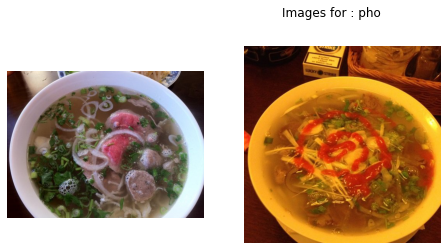

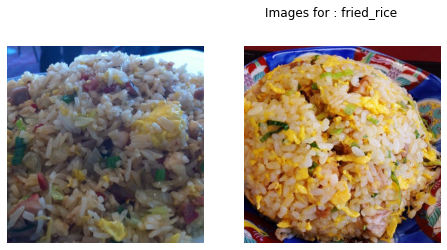

In [24]:
plt.figure(figsize=(12,7))
pho_images = plot_random_images("pho_fried_rice/train", "pho", 2)
fried_rice_images = plot_random_images("pho_fried_rice/train", "fried_rice",2)

### 4.2 Chuẩn bị dữ liệu (preprocessing data)

Chuẩn bị dữ liệu là một trong những bước quan trọng nhất mà dự án machine learning nào cũng đều bắt buộc phải có để chia tập dữ liệu lớn thành các tập dữ liệu nhỏ hơn gồm `train` và `test`, và đây cũng là một trong những bước khó khăn nhất. 

Trong trường hợp này, dữ liệu đã được chia sẵn thành `train` và `test`. Thông thường, chúng ta còn có thể chia tập dữ liệu thêm `validation`, nhưng việc này sẽ làm sau. 

Đối với những dự án phân loại hình ảnh, việc tách dữ liệu thành các folder con như `train` và `test` cho mỗi class là một tiêu chuẩn. 

Để bắt đầu, chúng ta sẽ chỉ ra đường dẫn liên kết của `train` và `test`



In [25]:
train_dir = "pho_fried_rice/train"
test_dir = "pho_fried_rice/test"

Bước tiếp theo, chia các dữ liệu thành từng cụm (batches) 

Một cụm (batch) là một tập hợp nhỏ của một tập dữ liệu mà mô hình có thể theo dõi được trong quá trình train. Ví dụ, thay vì đưa hết 10000 hình ảnh vào mô hình cùng một lúc và cố gắng để cho mô hình tìm kiếm các đặc trưng trong từng hình ảnh, thì mô hình theo cụm trong một lần sẽ chỉ cần lấy 32 hình ảnh để tìm kiếm đặc trưng đó. 

Tại sao phải phân cụm? Có một số lý do như sau : 

- Nếu cho 10.000 hình ảnh (hoặc có thể hơn) vào cùng một lúc sẽ dẫn đến bộ nhớ xử lý không đủ dung lượng (sức chứa) để  có thể chứa số lượng hình ảnh khổng lồ đó.
- Việc có gắng tìm kiếm các điểm đặc trưng của 10.000 hình ảnh trong 1 lần có thể làm cho mô hình học không tốt. 

Vây trong một cụm nên chưa bao nhiêu hình ảnh ? Đó là tùy ở bạn, nhưng theo những chuyên gia trong lĩnh vực này thì nó là **32**. [batch size of 32 is good for your health](https://twitter.com/ylecun/status/989610208497360896?s=20). 

Để chuyển tập dữ liệu thành từng cụm, chúng ta sẽ tạo một generator[`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

 `ImageDataGenerator` giúp chúng ta chuẩn bị các hình ảnh và phân chia chúng theo từng cụm cũng như thực hiện các phép biến đổi trước khi chúng được load vào mô hình.  Tham số `rescale` là một trong những phép biến đổi đó. Nhờ có tham số `rescale` với `1/255.` có nghĩa là lấy tất cả các giá trị chia cho 255. Điều này dẫn đến việc tất cả các giá trị của hình ảnh được chuẩn hóa ( chuyển thành giá trị từ 0-1 ). 

Bây giờ, thông qua các instance của `ImageDataGenerator` đã được khởi tạo ở trên, chúng ta có thể load hình ảnh từ đường dẫn tương ứng bằng cách sử dụng phương thức `flow_from_directory` của nó. 



In [28]:
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    class_mode="binary",
    batch_size=32,
)

test_data = train_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    class_mode="binary",
    batch_size=32,
)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Có thể thấy 1500 hình ảnh cho 2 class trong tập `train`, 500 hình ảnh cho 2 class trong tập `test`. 

- Do thư mục đã được cấu trúc trước đó, các classes đều được tạo ra bởi tên thư mục con nằm trong `train_dir` và `test_dir`. 
- Tham số `target_size` dùng để định nghĩa kích thước hình ảnh nhập vào theo định dạng `(height, width)`
- Tham số `class_mode` dùng để định nghĩa kiểu mô hình được sử dụng, với mô hình phân loại có 2 class là `binary`, với nhiều class là `categorical`. 
- Tham số `batch_size` định nghĩa có bao nhiêu hình ảnh được đưa vào trong mỗi cụm. Chúng ta sẽ lấy 32 làm giá trị mặc định. 

Với 1500 hình ảnh trong tập `train` sẽ chia làm bao nhiêu cụm ? 

In [29]:
1500 / 32 # -> 47 cụm

46.875

In [30]:
len(train_dataset) 

47

Kiểm tra kích thước của môt cụm trong số 47 cụm trên 

In [31]:
# Get a sample of the training data batch 
images, labels = train_data.next()# get the 'next' batch of images/labels

len(images), len(labels)

(32, 32)

Xem hình ảnh bên trong sẽ có gì, và kích thước của nó trông như thế nào : 

In [32]:
images[0], images[0].shape

(array([[[0.7725491 , 0.83921576, 0.94117653],
         [0.7725491 , 0.83921576, 0.94117653],
         [0.77647066, 0.8431373 , 0.9450981 ],
         ...,
         [0.9058824 , 0.97647065, 0.9843138 ],
         [0.90196085, 0.9725491 , 0.9803922 ],
         [0.909804  , 0.9803922 , 0.98823535]],
 
        [[0.7725491 , 0.83921576, 0.94117653],
         [0.7725491 , 0.83921576, 0.94117653],
         [0.7686275 , 0.8352942 , 0.93725497],
         ...,
         [0.90196085, 0.9725491 , 0.98823535],
         [0.909804  , 0.9803922 , 0.98823535],
         [0.9058824 , 0.97647065, 0.9843138 ]],
 
        [[0.77647066, 0.83921576, 0.94117653],
         [0.7725491 , 0.8352942 , 0.93725497],
         [0.76470596, 0.82745105, 0.9294118 ],
         ...,
         [0.90196085, 0.9725491 , 0.98823535],
         [0.909804  , 0.9803922 , 0.9960785 ],
         [0.9058824 , 0.97647065, 0.9843138 ]],
 
        ...,
 
        [[0.8862746 , 0.94117653, 0.9843138 ],
         [0.87843144, 0.9333334 , 0.97647

Vậy còn giá trị labels ?

In [33]:
labels

array([1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

Vì tham số `class_mode` là  `binary` nên label chỉ có 2 trường hợp hoặc 0 (pho) hoặc 1 (fried rice).

Dữ liệu hiện tại đã sẵn sàng, đến lúc cấu hình cho mô hình để tìm các mẫu đặc trưng giữa ma trận hình ảnh và labels 

### 4.3 Tạo mô hình CNN (bắt đầu với mô hình đơn giản làm cơ sở)

Có bao giờ bạn tự hỏi kiến trúc mô hình mặc định trông như thế nào chưa? Và thực tế có rất nhiều câu trả lời cho câu hỏi này. Một phương pháp đơn giản cho các mô hình thị giác máy tính là sử dụng kiến trúc mô hình đang hoạt động tốt nhất trên `ImageNet` ( một tập hợp lớn các hình ảnh đa dạng để đánh giá các mô hình thị giác máy tính khác nhau). 

Tuy nhiên, để bắt đầu những điều đơn giản nhất, chúng ta sẽ xây dựng mô hình nhỏ để đạt được kết quả cơ sở rồi sẽ tìm cách để cải thiện chúng. 

> 🔑**Lưu ý:** Trong deep learning, một mô hình càng nhỏ thì số lượng layer càng ít hơn so với những mô hình hiện đại.

Mô hình dưới đây được xây dựng từ 3 layer của CNN

In [34]:
model_4 = Sequential([
  layers.Conv2D(10,3,input_shape=(224,224,3),activation="relu"), # input layer (specify input shape)
  layers.Conv2D(10,3,activation="relu"),
  layers.MaxPool2D(),
  layers.Flatten(),
  layers.Dense(1, activation="sigmoid") # output layer (specify output shape)
])

Kiến trúc mô hình CNN cơ bản được được train xong. Và kiến trúc cụ thể như sau : 

`Input -> Conv2D + Relu Layer(non-lieanrities) -> Pooling Layer -> Full connected (dense layer) như  Output`

Trong Conv2D layer có một số component như sau : 

- `2D` nghĩa là dữ liệu đưa vào có 2 chiều `(height,width)`. Mặc dù dữ liệu hình ảnh có 3 kênh màu nhưng convolution sẽ chạy qua mỗi kênh đó một cách riêng biệt. 
- `filters` số lượng các `feature extractor` sẽ đi qua các hình ảnh 
- `kernel_size` kích thước của các filters, VD một `kernel_size` có kích thước `(3,3)` thì có nghĩa là mỗi filter sẽ là ma trận `(3,3)` trong mỗi lần trượt. kernel càng thấp nó sẽ trích xuất các đặc tính chi tiết hơn. 
- `stride` số pixel mà filter "nhảy" sau mỗi lần. VD : stride = 2 tức là di chuyển qua 2 pixel tại một thời điểm. 
- `padding` các giá trị có thể  là `same`, `valid`. Với `same` sẽ không tạo vùng bao phủ bên ngoài, do đó kích thước của  output sẽ giống với input. Trái lại, với `valid` sẽ cắt bớt các pixel dư thưa nơi `filter` không phù hợp (VD: hình ảnh có kích thước 224px độ rộng chia cho kernel_size là 3 sẽ là (224/3 = 74.6) nghĩa là các pixel lẻ sẽ bị gạt bỏ. 

`feature` nghĩa là gì ? `feature` có thể hiểu là đặc tính hay là một phần quan trong của một hình ảnh. VD `feature` của `pho`  có thể là những đoạn thẳng dài thể hiện chiều dài của sợi phở, hoặc với `fried_rice` có thể là những chấm bầu dục, hoặc có màu vàng đặc trưng cho cơm chiên. 

Một điều quan trọng cần nhớ những `features` này không được định nghĩa bởi chúng ta, mà thay vào đó, mô hình sẽ học được chúng từ việc áp dụng những fiters khác nhau thông qua hình ảnh.

Bây giờ, ta sẽ `compile` mô hình 

In [35]:
model_4.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

### 4.4 Fitting mô hình (mô hình tìm kiếm các đặc trưng trong dữ liệu weights , bias )

Mô hình đã được compile. Lúc này có thể fit được rồi. Nhưng bạn cần lưu ý 2 khái niệm mới trong mô hình : 

- `steps_per_epoch`: số cụm (batches) trong mô hình sẽ đi qua mỗi epoch. Trong trường hợp này, chúng ta muốn mô hình đi qua tất cả các cụm nên nó sẽ bằng với chiều dài của `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
- `validation_steps` : cũng tương tự như `steps_per_epoch` ngoại trừ nó áp dụng cho `validation_data`(500 test images in batches of 32 = 500/32 = ~16 steps)

In [36]:
model_4_history = model_4.fit(
    train_data,
    steps_per_epoch=len(train_data), 
    epochs=5, 
    validation_data=test_data, 
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 11s 230ms/step - loss: 1.0092 - accuracy: 0.5413 - val_loss: 0.6392 - val_accuracy: 0.7480
Epoch 2/5
47/47 [==============================] - 10s 223ms/step - loss: 0.5467 - accuracy: 0.7527 - val_loss: 0.4648 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 11s 226ms/step - loss: 0.4255 - accuracy: 0.8133 - val_loss: 0.4602 - val_accuracy: 0.7940
Epoch 4/5
47/47 [==============================] - 11s 227ms/step - loss: 0.2744 - accuracy: 0.8980 - val_loss: 0.4690 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 11s 226ms/step - loss: 0.1702 - accuracy: 0.9487 - val_loss: 0.5286 - val_accuracy: 0.7620


In [37]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 121000)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 121001    
Total params: 122,191
Trainable params: 122,191
Non-trainable params: 0
_________________________________________________________________


### 4.5 Đánh giá mô hình

Để đánh giá mô hình, có thể lấy biến được gán khi gọi hàm fit để theo dõi quá trình học của mô hình qua mỗi epoch. Cụ thê ở đây là biến `model_4_history`

In [38]:
import pandas as pd

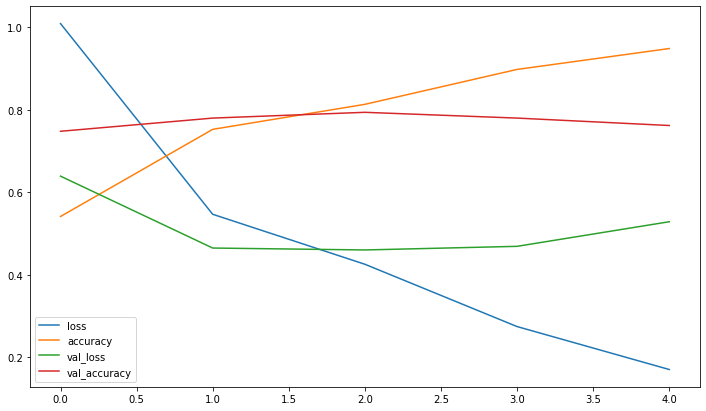

In [39]:
pd.DataFrame(model_4_history.history).plot(figsize=(12,7))

Nhìn qua biểu đồ có thể thấy : 

- `loss` giảm nhanh, trong khi `val_loss` không giảm mấy. Có vẻ như mô hình đang bị `overfitting` 

> 🔑 **Lưu ý**: Khi **validation loss** trong mô hình đang giảm mà bắt đầu có dấu hiệu tăng thì đó có thể là hiện tượng overfitting. Có thể hiểu trong quá trình train, mô hình học các mẫu đặc tính rất tốt, dường như là thuộc lòng nên khi đưa vào những dữ liệu mà nó chưa từng gặp, nó sẽ không làm được. 

Để trưc quan hơn, ta sẽ tách biểu đồ trên thành 2 biểu đồ con, một cái là accuracy và loss accuracy, còn lại là loss và val_loss

In [40]:
def plot_loss_curves(history) : 
  history = history.history 
  acc, val_acc = history["accuracy"], history["val_accuracy"]
  loss, val_loss = history["loss"], history["val_loss"]

  plt.figure(figsize=(16,6))
  plt.subplot(121)
  plt.plot(acc, label="train accuracy")
  plt.plot(val_acc, label="val accuracy")
  plt.title("Accurcay")
  plt.legend()

  plt.subplot(122)
  plt.plot(loss, label="train Loss")
  plt.plot(val_loss, label="val loss")
  plt.title("Loss")
  plt.legend()


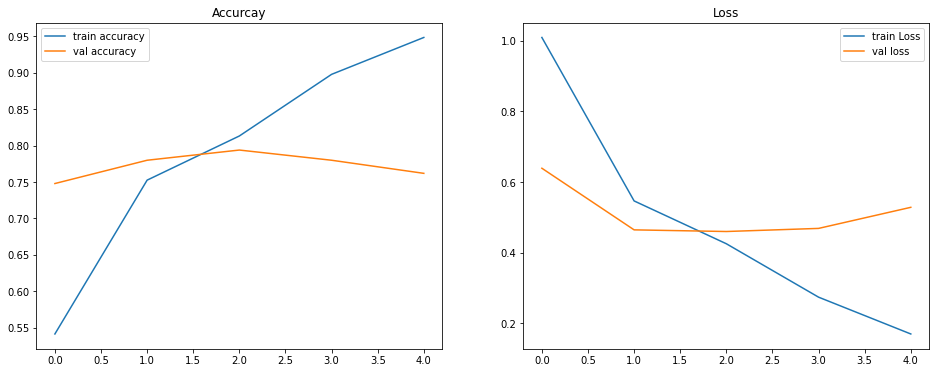

In [41]:
plot_loss_curves(model_4_history)

Vị trí lý tưởng cho 2 đường này là nối tiếp nhau. Trong biểu đồ này, đường `val_loss` nên giảm xuống. Nếu như có khoảng cách giữa đường train và đường loss quá lớn, thì điều đó có nghĩa mô hình đang bị `overfitting`, 

In [42]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 121000)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 121001    
Total params: 122,191
Trainable params: 122,191
Non-trainable params: 0
_________________________________________________________________


### 4.6 Cải thiện mô hình

Viẹc diều chỉnh mô hình machine learning xuất phát từ 3 bước : 

1. Tạo mô hình cơ sở
2. Vượt qua mô hình cơ sở nhưng xảy ra overfitting
3. Giảm overfitting

Chúng ta đã qua bước 1 và 2. Có vài cách có thể giảm overfit cho mô hình :

1. Tăng số lượng convolutional layers
2. Tăng số lượng filters 

Nhưng thay vì tập trung làm cho các đường cong của mô hình được phù hợp với nhau, chúng ta sẽ thực hiện bước 3, làm như thế nào để giảm được overfitting?

Khi mô hình học quá tốt trên tập dữ liệu train, nhưng khi gặp một dữ liệu nào đó chưa từng thấy, nó gặp rắc rối và không hoạt động tốt như lúc học. Trong thực tế  cũng vậy, mô hình tốt phải là mô hình có khả năng thích ứng tốt với những sự vật đang diễn ra chứ không phải những gì nó đã biết rồi. 

Chính vì vậy, trong mô hình tiếp theo, sẽ có một số điều chỉnh vế số lượng tham số và giám sát song song các đường `trainning`. 

Chúng ta sẽ xây dựng thêm 2 mô hình với một số layer bổ sung thêm : 
+ 1 ConvNet với [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
+ 1 ConvNet với  max pooling and data augmentation


Mô hình đầu tiên sẽ có kiến trúc như sau : 

```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```


#### model_5

In [43]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)),  
  layers.MaxPool2D(),
  layers.Conv2D(10,3,activation="relu"),
  layers.MaxPool2D(),
  layers.Conv2D(10,3,activation="relu"),
  layers.MaxPool2D(),
  layers.Flatten(),
  layers.Dense(1, activation="sigmoid")
])

model_5.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_5_history = model_5.fit(
    train_data,
    steps_per_epoch=len(train_data),
    epochs=5,
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 11s 224ms/step - loss: 0.7117 - accuracy: 0.5313 - val_loss: 0.6209 - val_accuracy: 0.7080
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.6225 - accuracy: 0.6593 - val_loss: 0.5834 - val_accuracy: 0.6880
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.5526 - accuracy: 0.7167 - val_loss: 0.4811 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 10s 218ms/step - loss: 0.4727 - accuracy: 0.7787 - val_loss: 0.4165 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.4365 - accuracy: 0.8060 - val_loss: 0.4079 - val_accuracy: 0.8320


Trước khi vễ loss_curves, ta sẽ kiểm tra kiến trúc `model_5` trước : 


In [44]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

Mỗi lần gọi `MaxPool2D`, kích thước của hình giảm đi một nửa. Layer `MaxPool2D` lấy output của mỗi `Conv2D` và chỉ lấy các đặc tính quan trọng, còn lại nó loại bỏ đi. 

Nếu tham số `pool_size` càng lớn thì `MaxPool` sẽ càng loại bỏ nhiều đặc tính trong hình ra càng nhiều. Tuy nhiên, khi loại đi như vậy nó có thể sẽ bỏ sót các đặc tính quan trọng của hình đó dẫn đến việc mô hình bỏ sót không hoc được gì cả. 

Kết quả của việc gộp này làm giảm đáng kể  trainable params (`8,861` của model_5 so với `122,191` của model_4)

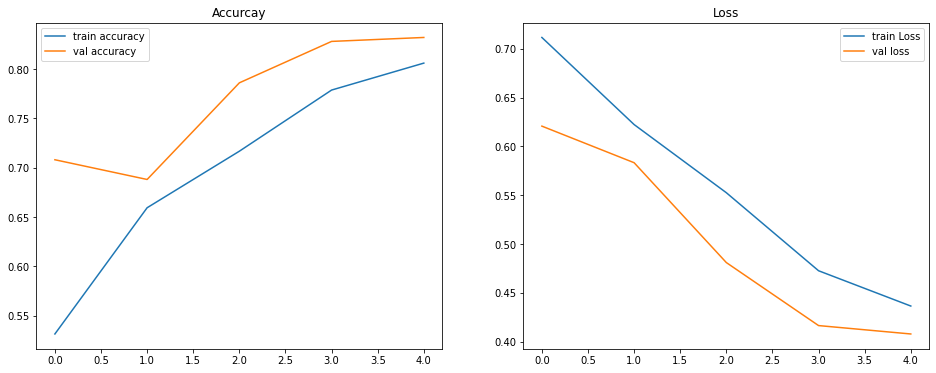

In [45]:
# Plot loss curves of model_5 results
plot_loss_curves(model_5_history)

#### model_6 (data augmentation không xáo trộn dữ liệu)

Các đường cong giữa train và val đã gần nhau. Tuy nhiên, trong qúa loss vẫn còn có lúc tăng, có lẽ nếu train lâu hơn thì mô hình vẫn sẽ bị overfitting. 

Một cách để giúp cho mô hình không học "thuộc lòng" đó nhằm ngăn chặn overfitting, đó là tạo **data augmentation**. 

Trước tiên chúng ta vẫn sẽ khởi tạo `ImageDataGenerator`, trong nó có chứa các tham số để làm hình ảnh "biến dạng" ngẫu nhiên nên ta sẽ thêm các tham số vào class này. 

> 🤔 Data augmentation là gì ?

**Data augmentation** là quá trình thay đổi dữ liệu train giúp cho các dữ liệu trở nên phong phú, đa dạng hơn (thay đổi góc hình, zoom hình, làm cho hình giãn ra hoặc co lại, lật ngược hình ảnh so với ban đầu...) thay vì chỉ là những hình chụp đơn thuần như trước. Điều này cho phép mô hình hoc được nhiều hơn. 

Việc sử dụng **data augmentation** sẽ là một cách giúp mô hình ngăn chặn overfitting và làm cho mô hình có tính khái quát hơn. 

> 🔑**Lưu ý** : Data augmentation thường chỉ được dùn cho quá trình train, không sử dụng cho test cũng như validation. Việc sử dụng `ImageDataGenerator` với các tham số của data augmentation được xây dựng sẵn trong đó sẽ giúp cho hình ảnh được giữ nguyên trong thư mục cho đến khi load vào mô hình, chúng sẽ được thao tác ngẫu nhiên. 

In [66]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255, 
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          width_shift_range=0.2, 
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          )
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen =  ImageDataGenerator(rescale=1/255.)

Trong phương thức `flow_from_directory` của mỗi instance trên có tham số `shuffle` mặc định là `True`,  nghĩa là dữ liệu được đưa vào sẽ được xáo trộn, không để dữ liệu theo thứ tự ban đầu. Trước tiên, với mô hình dưới, chúng ta sẽ để `shuffle` là `False` tức là giữ nguyên thứ tự của dự liệu được đưa vào để xem mô hình học có đạt hiệu quả hay không.

In [48]:
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode="binary",
    shuffle=False   
)

print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    class_mode="binary",
    shuffle=False
)

print("Unchanged test images:")
test_data =test_datagen.flow_from_directory(
    test_dir, 
    target_size=(224,224),
    class_mode="binary"
)



Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Thiết lập hình ảnh để xem sự thay khác biệt giữa hình ảnh ban đầu và hình ảnh sau khi được augmented


In [49]:
images,labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Text(0.5, 1.0, 'Hình ảnh sau khi được augmented')

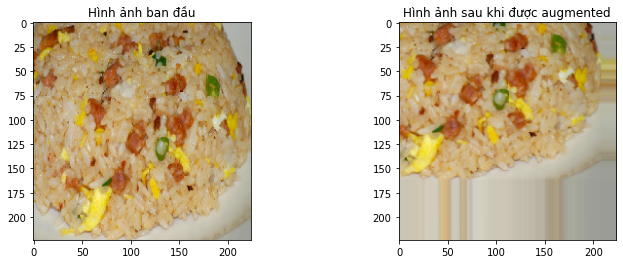

In [54]:
random_image_index = random.choice(range(len(images)))
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.imshow(images[random_image_index])
plt.title(f"Hình ảnh ban đầu")
plt.subplot(122)
plt.imshow(augmented_images[random_image_index])
plt.title(f"Hình ảnh sau khi được augmented")

Hình ảnh sau khi được augmented trông có khá giống với hình ảnh ban đầu, nhưng nó bị lật ngược và kéo giãn ra theo cả chiều ngang và chiều cao. Điều này sẽ tăng độ khó làm cho mô hình sẽ buộc phải cố gắng học các đặc tính trong một hình ảnh kém hoàn mỹ hơn. Thực tế, đây cũng là cách làm phổ biến khi train mô hình sử dụng hình ảnh

> 🤔 Vậy có nên sử dụng data augmentation không? Và nên thay đổi hình dạng của chúng ở mức độ nào cho phù hợp ?

Data augmentation là một cách để ngăn chặn việc học quá tốt của mô hình dẫn đến khi test nó không thể làm tốt như trong quá trình học (overfitting). Nếu mô hình bị overfitting, thì bạn có thể thử với data augmentation, còn bình thường thì không cần thiết. 

Còn về việc thay đổi tỉ lệ, hình dạng của hình ảnh bao nhiêu là phù hợp thì đó là tùy thuộc vào cách thiết lập mà bạn muốn, nó không quy tiêu chuẩn nào cả, chỉ là dựa trên sự trải nghiệm của bạn đối với dữ liệu hình ảnh đó. 

Tiếp theo, chúng ta sẽ xây dựng mô hình dựa trên data augmented để xem nó có ảnh hưởng như thế nào đến quá trình `train` của mô hình

In [55]:
model_6 = Sequential([
  layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
  layers.MaxPool2D(),
  layers.Conv2D(10,3,activation="relu"),
  layers.MaxPool2D(),
  layers.Conv2D(10,3,activation="relu"),
  layers.MaxPool2D(),
  layers.Flatten(),
  layers.Dense(1, activation="sigmoid")
])

model_6.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_6_history = model_6.fit(
    train_data_augmented,
    steps_per_epoch=len(train_data_augmented),
    epochs=5, 
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 26s 535ms/step - loss: 0.7019 - accuracy: 0.4700 - val_loss: 0.6909 - val_accuracy: 0.5460
Epoch 2/5
47/47 [==============================] - 24s 517ms/step - loss: 0.7014 - accuracy: 0.5400 - val_loss: 0.6867 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 25s 522ms/step - loss: 0.6895 - accuracy: 0.5493 - val_loss: 0.6580 - val_accuracy: 0.6320
Epoch 4/5
47/47 [==============================] - 24s 517ms/step - loss: 0.6967 - accuracy: 0.5013 - val_loss: 0.6605 - val_accuracy: 0.6280
Epoch 5/5
47/47 [==============================] - 24s 513ms/step - loss: 0.6750 - accuracy: 0.5920 - val_loss: 0.6333 - val_accuracy: 0.6220


> Sao mô hình train lại kém hơn so với trước nhỉ? 🤔 

Đó là bởi vì khi chúng ta tạo mô hình `train_data_augmented`,  chúng ta đã tắt tính năng `shuffle` làm cho các dữ liệu được đưa vào mô hình theo thứ tự chứ không bị xáo trộn khiến cho khi mô hình train theo từng cụm với 32 hình ảnh, nó chỉ toàn thấy một kiểu hình ảnh hoặc của `pho` hoặc của `fried_rice`. Đến khi train xong bước đó, nó sẽ tiến hành kiểm tra qua `validation` thì nó không nhận diện một cách đúng đắn được hình ảnh đó là gì. 

Do đó, việc trộn hình ảnh của các class vào trong một cụm để mô hình train là cực kỳ quan trọng, nó giúp cho mô hình thay vì chỉ học đơn điệu một class duy nhất thì nó học được nhiều đặc tính khác nhau của các class gắn liền với đặc tính đó. 

Mô hình trên đây là một thử nghiệm nhỏ giúp bạn có thể hiểu được cách thức hoạt động của mô hình khi train với dữ liệu bất kỳ. Nếu mô hình tốt nhưng dữ liệu không tốt thì kết qủa mà nó đem lại cũng không tốt. Nên việc chuẩn bị dữ liệu trước khi train là vô cùng quan trọng. 

Bây giờ, chúng ta sẽ thay đổi `shuffle` là `True` để làm cho dữ liệu được xáo trộn. 

Nếu bạn để ý, `model_5` và `model_6` cùng có một cấu trúc, nhưng thời gian thực thi mỗi epoch của chúng lại chênh lệch rất lớn (`model_5` chỉ 10s trong khi `model_6` đến ~24s). Đó là vì khi train với dữ liệu được augmented, `ImageDataGenerator` sẽ copy hình ảnh gốc rồi làm "biến dạng", thay đổi dữ liệu hình ảnh đó trước khi đưa vào trong mô hình. Một ưu điểm của cách làm này là nó không làm thay đổi hình dạng của hình ảnh gốc nhưng nhược điểm là mất rất nhiều thời gian để xử lý. 

> 🔑**Key** : Một phương pháp giúp tăng tốc độ xử lý tập dữ liệu bạn có thể tham khảo tại  [TensorFlow's parrallel reads and buffered prefecting options](https://www.tensorflow.org/tutorials/images/data_augmentation).

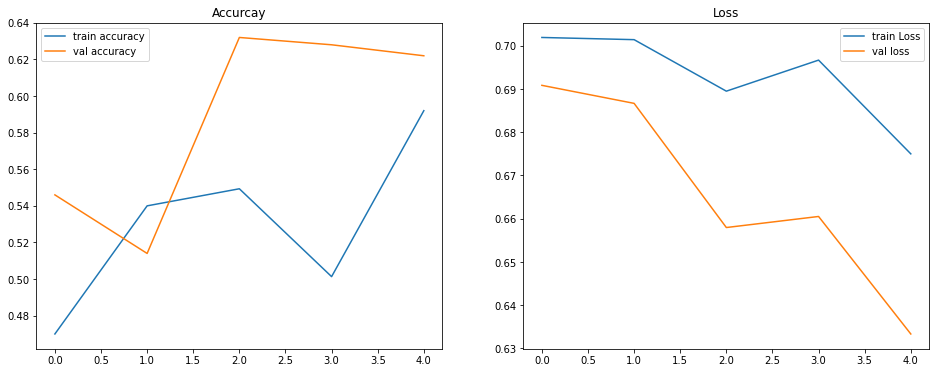

In [56]:
plot_loss_curves(model_6_history)

Có vẻ như đường loss vẫn có thời điểm nó tăng lên (đường loss lý tưởng tưởng nhất là đường không quá nhọn, và là đường dốc xuống)

Mô hình tiếp theo sẽ sử dụng data_augmentation được xáo trộn. Liệu nó có hoạt động tốt hơn so với chưa được xáo trộn không ? Chúng ta sẽ xây dựng nó ngay bây giờ. Trước hết, sẽ chúng ta sẽ định nghĩa lai instance của `ImageDataGenerator`

#### model_7 (data augmentation được xáo trộn dữ liệu)

In [67]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224,224), 
    batch_size=32,
    class_mode="binary",
    shuffle=True
)

Found 1500 images belonging to 2 classes.


Thay vì viết lại toàn bộ mô hình, `model_7` sẽ copy từ `model_6` và chỉ cần compile và fit lại.

In [59]:
model_7 = tf.keras.models.clone_model(model_6)

model_7.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_7_history = model_7.fit(
    train_data_augmented_shuffled,
    steps_per_epoch=len(train_data_augmented_shuffled),
    epochs=5, 
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 26s 542ms/step - loss: 0.6797 - accuracy: 0.5893 - val_loss: 0.5845 - val_accuracy: 0.7340
Epoch 2/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6099 - accuracy: 0.6707 - val_loss: 0.5111 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 25s 541ms/step - loss: 0.5441 - accuracy: 0.7200 - val_loss: 0.4714 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 25s 527ms/step - loss: 0.5166 - accuracy: 0.7347 - val_loss: 0.4230 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 25s 530ms/step - loss: 0.4819 - accuracy: 0.7700 - val_loss: 0.4796 - val_accuracy: 0.7660


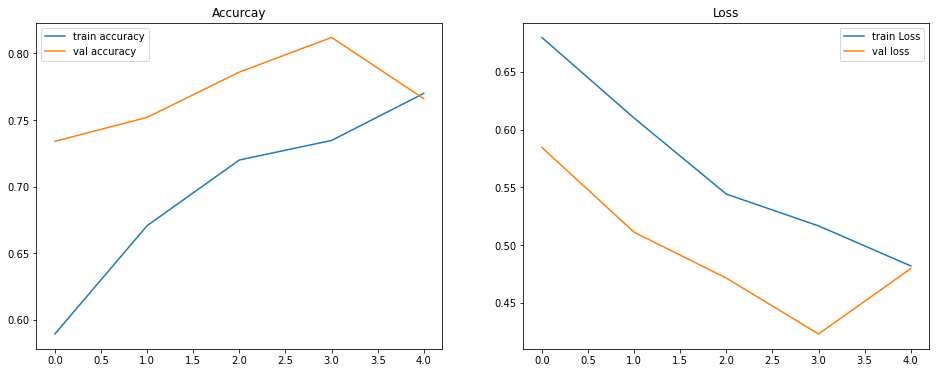

In [60]:
plot_loss_curves(model_7_history)


Có thể thay rằng hiệu suất mà `model_7` đem lại được cải thiện đáng kể so với `model_6`. Đó là công dụng của việc trộn dữ liệu trước khi đưa vào từng cụm trong mô hình. Khi train, mô hình có thể quan học được cả dữ liệu từ 2 class `pho` và `fried_rice` ở mỗi cụm và có thể đánh giá được những gì nó đã học từ cả 2 class hơn là chỉ 1 class. 

Đường loss của `model_7` có vẻ giảm nhiều và đồng đều giữa `train` và `validation` so với `model_6` nhưng nó vẫn có thời điểm tăng. Có thể do mô hình chưa đủ độ phức tạp để mô hình học được tốt hơn. Chúng ta sẽ tiếp tục cải thiện mô hình.

#### model_8 Cải thiện mô hình sử dụng data augmentation

Chúng ta đã train khá nhiều mô hình trên tập dữ liệu và chúng đem lai kết quả khá khả quan. Nhưng mô hình có thể hoạt động tốt hơn nữa không?  

Ở những module trước, bạn có nhớ cách để cải thiện mô hình không?  Bây giờ, chúng ta sẽ cùng điểm lại một số phương pháp để cải thiện mô hình : 

- Tăng số lượng layers cho mô hình (Thêm Conv2D layers)
- Tăng số lượng filters trong mỗi Convolutional layer( VD : 10, hoặc 32,64,128... những con số này không cố định, chúng thường được tìm thấy thông qua quá trình thử và sai). 
- Train mô hình lâu hơn (tăng số epochs) 
- Tìm learning_rate tốt cho mô hình
- Tăng thêm nhiều dữ liệu (Tạo điều kiện cho mô hình học được nhiều hơn) 
- Sử dụng **transfer learning** để tận dụng lại mô hình đã được xây dựng và học trước đó và thay đổi các tham số cho phù hợp với trường hợp của chúng ta. 

Việc thay đổi các thiết lập trước đó (ngoại trừ 2 ý cuối) trong quá trình phát triển mô hình thường được gọi là ** hyperparameter tuning** (điều chỉnh hyperparameter)

> **hyperparameter tuning** có thể hiểu như là món ăn đã được chế biến sẵn, bạn chỉ cần nêm nếm sao cho phù hợp với khẩu vị của mình.

`model_8` tới đây sẽ quay trở lại nơi ta bắt đầu xây dựng mô hình  (`model_1`  hay the TinyVGG architecture from [CNN explainer](https://poloclub.github.io/cnn-explainer/))


In [68]:
model_8 = Sequential([
    layers.Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    layers.Conv2D(10,3,activation="relu"),
    layers.MaxPool2D(),
    layers.Conv2D(10,3,activation="relu"),
    layers.Conv2D(10,3,activation="relu"),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid")
])

model_8.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model_8_history = model_8.fit(
    train_data_augmented_shuffled,
    steps_per_epoch=len(train_data_augmented_shuffled),
    epochs=5, 
    validation_data=(test_data),
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 26s 548ms/step - loss: 0.6902 - accuracy: 0.5667 - val_loss: 0.6233 - val_accuracy: 0.6180
Epoch 2/5
47/47 [==============================] - 26s 543ms/step - loss: 0.6252 - accuracy: 0.6673 - val_loss: 0.5537 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 25s 540ms/step - loss: 0.5801 - accuracy: 0.6947 - val_loss: 0.5083 - val_accuracy: 0.7460
Epoch 4/5
47/47 [==============================] - 25s 537ms/step - loss: 0.5383 - accuracy: 0.7347 - val_loss: 0.4845 - val_accuracy: 0.7620
Epoch 5/5
47/47 [==============================] - 26s 542ms/step - loss: 0.5087 - accuracy: 0.7473 - val_loss: 0.4506 - val_accuracy: 0.7780


In [69]:
model_8.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 28090)            

In [70]:
model_1.summary( )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

Text(0.5, 0.98, 'model_8 VGG Tiny architecture')

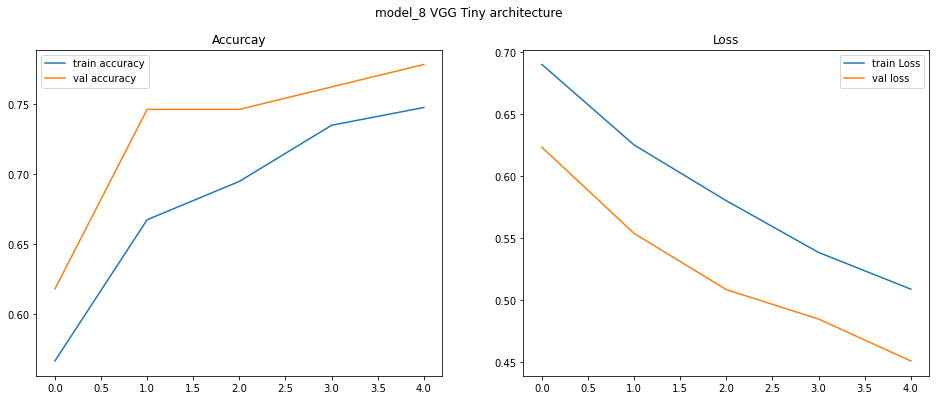

In [72]:
plot_loss_curves(model_8_history)
plt.suptitle("model_8 VGG Tiny architecture")

Text(0.5, 0.98, 'model_1 VGG Tiny architecture')

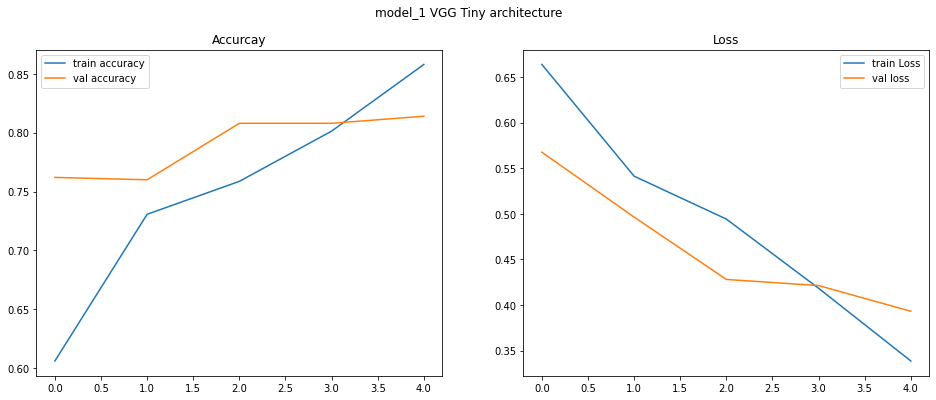

In [73]:
plot_loss_curves(model_1_history)
plt.suptitle("model_1 VGG Tiny architecture")

`model_8` các đường cong đồng đều hơn, nhưng hiệu suất của mô hình `train` và `test` không thể hơn được so với `model_1`. Đó là vì khi đưa hình ảnh biến dạng vào, mô hình sẽ học được nhiều thứ hơn nhưng cốt lõi của dữ liệu sẽ không được nhiều. 

### 4.7 Dự đoán với mô hình được train

Một mô hình tốt là mô hình có khả năng dự đoán các dữ liệu mà nó chưa từng biết đến chính xác. Để kiểm chứng điều này, chúng ta sẽ lấy một số hình ảnh bên ngoài liên quan đến `pho` và `fried_rice` để test mô hình. 

In [75]:
# download hình ảnh được lấy trên Google 
!wget https://www.dropbox.com/s/7p20cozvy41oaq1/pho-com-chien-test.zip

--2021-09-07 03:23:53--  https://www.dropbox.com/s/7p20cozvy41oaq1/pho-com-chien-test.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7p20cozvy41oaq1/pho-com-chien-test.zip [following]
--2021-09-07 03:23:54--  https://www.dropbox.com/s/raw/7p20cozvy41oaq1/pho-com-chien-test.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3a04c31457b47be6e1bceb46c1.dl.dropboxusercontent.com/cd/0/inline/BVoOXr41qz64qqATKqezJIByNJq2Xe0fbQWf5tOWufe2-KvivJOxT5gRzoqzpYoMKJun1rsHwA9khrzm1mCY7ubWDjl8gqdQCqnCFE3L0dnh8B-K4s6PFAHwopfx6bHdZsFBIoZePioTPDW1Y-nS0XgH/file# [following]
--2021-09-07 03:23:54--  https://uc3a04c31457b47be6e1bceb46c1.dl.dropboxusercontent.com/cd/0/inline/BVoOXr41qz64qqATKqezJIByNJq2Xe0fbQWf5tOWufe2-KvivJOxT5gRz

In [76]:
unzip_file("pho-com-chien-test.zip")

Unziped file


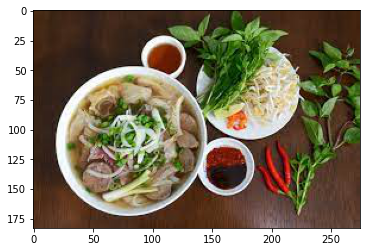

In [78]:
predicted_dir = "pho-com-chien-test"

random_image_name = random.choice(os.listdir(predicted_dir))
target_image_dir = os.path.join(predicted_dir, random_image_name)
target_image = plt.imread(target_image_dir)
plt.imshow(target_image)

Trước khi dự đoán mô hình, chúng ta cần tạo một hàm để load và đưa hình ảnh về đúng định dạng mà chúng ta đã thiết lập từ trước

In [140]:
def load_and_prep_image(image_dir, shape=(224,224)) : 
  image = tf.io.read_file(image_dir) 
  image = tf.image.decode_image(image,channels=3)
  # resize image 
  image = tf.image.resize(image,size=shape)
  return image / 255. 

In [141]:
pho = load_and_prep_image("/content/pho-com-chien-test/pho1.jpg")
pho, pho.shape

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.00000000e+00, 1.17647061e-02, 5.88235296e-02],
         [3.92156886e-03, 1.96078438e-02, 6.66666701e-02],
         [3.92156886e-03, 1.96078438e-02, 6.66666701e-02],
         ...,
         [0.00000000e+00, 1.66667346e-02, 0.00000000e+00],
         [0.00000000e+00, 3.55742276e-02, 1.40055490e-04],
         [0.00000000e+00, 3.55742276e-02, 1.40055490e-04]],
 
        [[3.92156886e-03, 1.96078438e-02, 6.66666701e-02],
         [0.00000000e+00, 1.21848723e-02, 5.92436977e-02],
         [0.00000000e+00, 1.52661083e-02, 6.23249300e-02],
         ...,
         [2.09432524e-02, 4.83942330e-02, 1.70216840e-02],
         [1.17647061e-02, 1.56862754e-02, 0.00000000e+00],
         [1.17647061e-02, 1.56862754e-02, 0.00000000e+00]],
 
        [[3.92156886e-03, 1.96078438e-02, 5.49019612e-02],
         [0.00000000e+00, 1.17647061e-02, 4.70588244e-02],
         [0.00000000e+00, 8.54341127e-03, 5.56022339e-02],
         ...,
         [0

Tuyệt vời, cấu trúc ma trận của hình ảnh đã đúng như định dạng. Thử dự đoán xem sao ?


In [142]:
try : 
  model_8.predict(pho)
except ValueError as err: 
  print(err)

in user code:

    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1586 predict_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1569 run_step  **
        outputs = model.predict_step(data)
    /usr/local/lib/python3.7/dist-packages/

Có lỗi xảy ra. 

Mặc dù hình ảnh dự đoán đã có cùng kích thước với hình ảnh được train nhưng nó vẫn còn thiếu chiều. `expected min_ndim=4, found ndim=3` nghĩa là nó mong muốn được nhận một hình ảnh có cấu trúc 4 chiều nhưng thực tế chỉ có 3. 

Khi mô hình được train theo cụm nó sẽ lấy chiều đầu tiên làm kích thước tính theo số cụm (batch size) còn lại nó sẽ giữ nguyên kích thước của hình ảnh. Do đó, mô hình được train có hình dạng `(số cụm, 224,224,3)`. Vậy nên chúng ta cần tăng thêm số chiều cho hình ảnh được dự đoán là 1 ở chiều đầu tiên tượng trưng cho số cụm như hình dạng của mô hình. 

Để tăng số chiều trong tensorflow có thể sử dụng  [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [143]:
# Tăng số chiều cho hình ảnh pho
print(f"Hình dạng của pho : {pho.shape}")
pho = tf.expand_dims(pho, axis=0)
print(f"Hình dạng của pho sau khi tăng thêm 1 chiều : {pho.shape}")

Hình dạng của pho : (224, 224, 3)
Hình dạng của pho sau khi tăng thêm 1 chiều : (1, 224, 224, 3)


OK, lúc này có thể đưa hình ảnh vào mô hình để dự đoán

In [144]:
pho_pred_prob = model_8.predict(pho)
pho_pred_prob

array([[0.8494561]], dtype=float32)

Các dự đoán xuất hiện ở dạng xác suất chứ không phải ở dạng label của nó. Nói cách khác, xác suất để hình ảnh là lớp này hoặc lớp khác là bao nhiêu. 

Nhưng khi chúng ta đang xử lý vấn để binary class, nếu xác suất dự đoán >=0.5 thì mô hình dự đoán là class `1`. Ngược lại, nếu <0.5 thì mô hình dự đoán là class `0`.

Do đó, `pho_pred` dự đoán là 0.225 nghĩa là `0`. Chúng ta sẽ làm tròn xác suất dự đoán để nó chỉ là `0` hoặc `1` bằng `tf.round()`


In [145]:
pho_pred_label = class_names[int(tf.round(pho_pred_prob[0]))]
pho_pred_label

'pho'

Thay vì dự đoán thủ công như trên, chúng ta sẽ tạo hàm để có thể dự đoán số hình ảnh mà chúng ta muốn

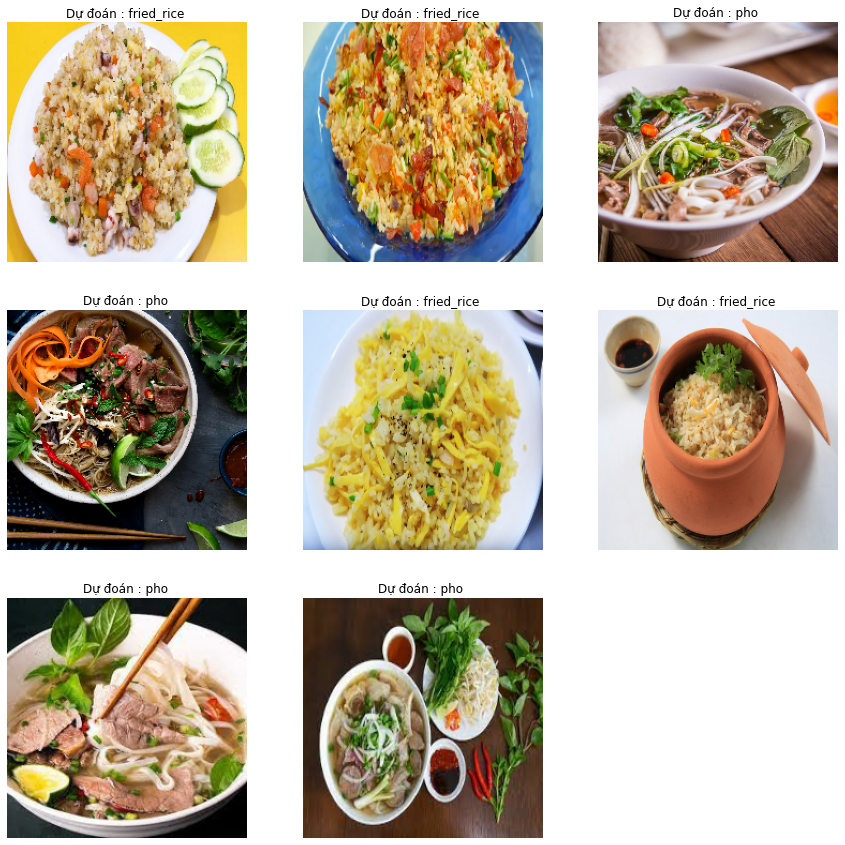

In [155]:
import math
def make_predict_images(model, test_dir, n_samples=None, image_shape=(224,224)) :   
  if n_samples is None: 
    images_dir = [os.path.join(test_dir, image_dir) for image_dir in os.listdir(test_dir)]
  else :
    random_images_name = random.sample(os.listdir(test_dir), k=n_samples)
    images_dir = [os.path.join(test_dir, ) for image_name in random_images_name]
  n_cols=3
  n_rows= math.ceil(len(images_dir) / n_cols)
  plt.figure(figsize=(n_cols*5, n_rows * 5))
  for image_index, image_dir in enumerate(images_dir) :     
    plt.subplot(n_rows, n_cols, image_index+1)
    image = load_and_prep_image(image_dir, shape=image_shape)    
    model_pred_prob = model.predict(tf.expand_dims(image, axis=0))
    model_pred = class_names[int(tf.round(model_pred_prob[0]))]   
    plt.imshow(image)
    plt.title(f"Dự đoán : {model_pred} ")
    plt.axis(False)
make_predict_images(model_8, predicted_dir)